# Welcome to Tapy

<img src="pics/TaPy_logo.png"  width="250" height="250"/>

This notebook will illustrate the use of the TaPy library by going through a typical analysis

## Set up system

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
%matplotlib notebook

Add TaPy to python path

In [2]:
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import tapy
from tapy.grating_interferometer import GratingInterferometer
from tapy.roi import ROI

## Data Folders

Open Beam data path

In [3]:
path_ob = '../data/data_OB/'
assert os.path.exists(path_ob)

Sample data path

In [4]:
path_im = '../data/data_smp'
assert os.path.exists(path_im)

Dark Current data path

In [5]:
path_df = '../data/data_df'
assert os.path.exists(path_df)

## Loading Data 

In [6]:
o_grating = GratingInterferometer()
o_grating.load(folder=path_im)
o_grating.load(folder=path_ob, data_type='ob')
o_grating.load(folder=path_df, data_type='df')

## Dark Field (DF) correction 

In [7]:
o_grating.df_correction()

## Normalization of the data 

We will use a normalization ROI.
```
 x0 = 3
 y0 = 5
 width = 20
 height = 40
```

In [8]:
#norm_roi = ROI(x0=3, y0=5, width=20, height=40)
#o_grating.normalization(roi=norm_roi)

## Calculate and display oscillation

<IPython.core.display.Javascript object>


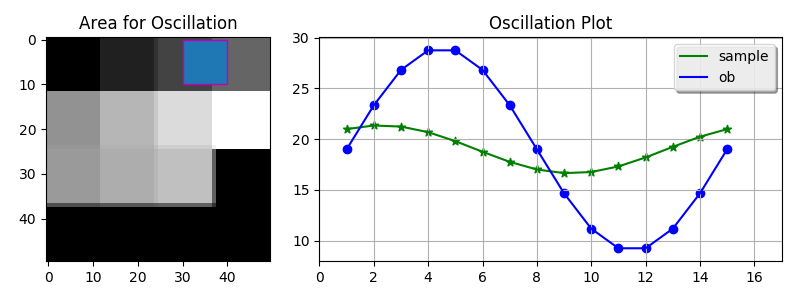

In [119]:
x0=30
y0=0
width=10
height=10

osc_roi = ROI(x0=x0, y0=y0, width=width, height=height)
o_grating.oscillation(roi=osc_roi, plot=True)

sample_oscillation = o_grating.data['sample']['oscillation']
ob_oscillation = o_grating.data['ob']['oscillation']

## Binning

In [12]:
o_grating.binning(bin=2)

## WORK IN PROGRESS

In [15]:
sample = o_grating.data['sample']['data']
ob = o_grating.data['ob']['data']

In [22]:
numberPeriods = 1

working with sample (will have to do the same with OB)

In [19]:
[nbr_images, height, width] = np.shape(sample)
print("shapetack contains {} images of {} by {}".format(nbr_images, height, width))

shapetack contains 15 images of 50 by 50


In [20]:
B = np.zeros((nbr_images, 3))
rangeStack = np.arange(nbr_images)

In [70]:
print("shape before is {}".format(np.shape(sample)))
stack_imReshaped = np.reshape(sample, [nbr_images, height * width])
print("shape after is {}".format(np.shape(stack_imReshaped)))

shape before is (15, 50, 50)
shape after is (15, 2500)


In [39]:
for _index in np.arange(nbr_images):
    B[_index][0] = 1.0
    B[_index][1] = np.cos(2.*np.pi*_index*numberPeriods/(nbr_images-1))
    B[_index][2] = np.sin(2.*np.pi*_index*numberPeriods/(nbr_images-1))
        

In [42]:
print(type(B))

<class 'numpy.ndarray'>


array([[  1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   9.00968868e-01,   4.33883739e-01],
       [  1.00000000e+00,   6.23489802e-01,   7.81831482e-01],
       [  1.00000000e+00,   2.22520934e-01,   9.74927912e-01],
       [  1.00000000e+00,  -2.22520934e-01,   9.74927912e-01],
       [  1.00000000e+00,  -6.23489802e-01,   7.81831482e-01],
       [  1.00000000e+00,  -9.00968868e-01,   4.33883739e-01],
       [  1.00000000e+00,  -1.00000000e+00,   1.22464680e-16],
       [  1.00000000e+00,  -9.00968868e-01,  -4.33883739e-01],
       [  1.00000000e+00,  -6.23489802e-01,  -7.81831482e-01],
       [  1.00000000e+00,  -2.22520934e-01,  -9.74927912e-01],
       [  1.00000000e+00,   2.22520934e-01,  -9.74927912e-01],
       [  1.00000000e+00,   6.23489802e-01,  -7.81831482e-01],
       [  1.00000000e+00,   9.00968868e-01,  -4.33883739e-01],
       [  1.00000000e+00,   1.00000000e+00,  -2.44929360e-16]])

<IPython.core.display.Javascript object>


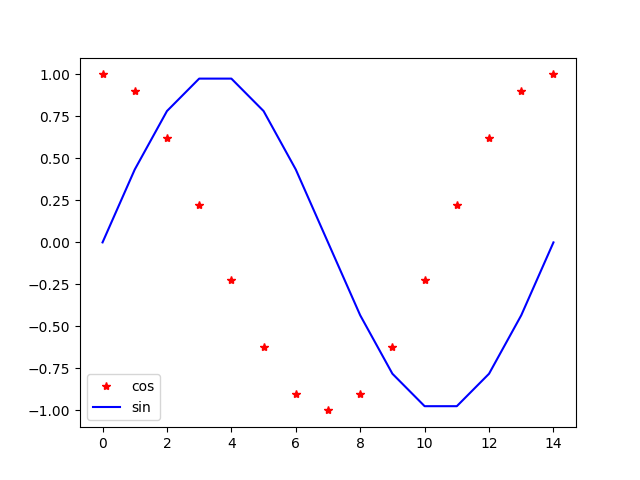

In [66]:
x_axis = np.arange(nbr_images)
y_axis_1 = [_value[1] for _value in B]
y_axis_2 = [_value[2] for _value in B]
plt.figure(0)
plt.plot(x_axis, y_axis_1, '*r', label='cos')
plt.plot(x_axis, y_axis_2, 'b', label='sin')
plt.legend()

In [67]:
B = np.matrix(B)

In [68]:
G = (B.T * B).I * B.T

Taking advantage of the numpy broadcasting feature

In [75]:
print(np.shape(G))
print(np.shape(stack_imReshaped))

(3, 15)
(15, 2500)


In [76]:
A = G * stack_imReshaped

In [77]:
print(np.shape(A))

(3, 2500)


In [78]:
offset, absolute_amplitude, absolute_phase = A[0,:], A[1,:], A[2,:]

<IPython.core.display.Javascript object>


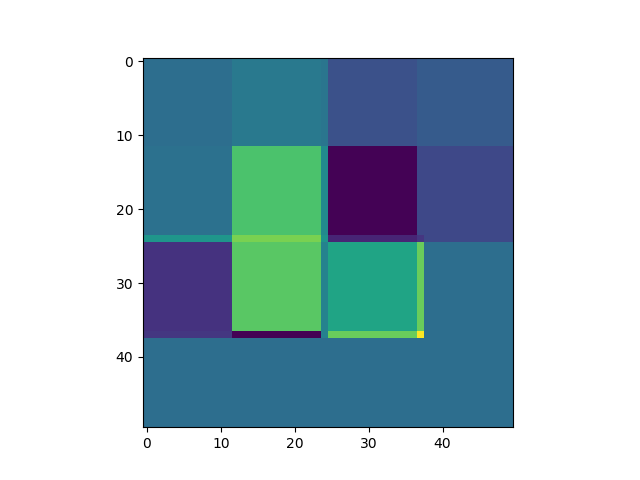

In [91]:
a0 = np.reshape(offset, [height, width])
plt.figure(2)
plt.imshow(a0)

In [103]:
np.shape(np.asarray(absolute_amplitude))

(1, 2500)

In [113]:
a1 = np.reshape(np.sqrt(np.square(absolute_amplitude) + np.square(absolute_phase)), [height, width])

<IPython.core.display.Javascript object>


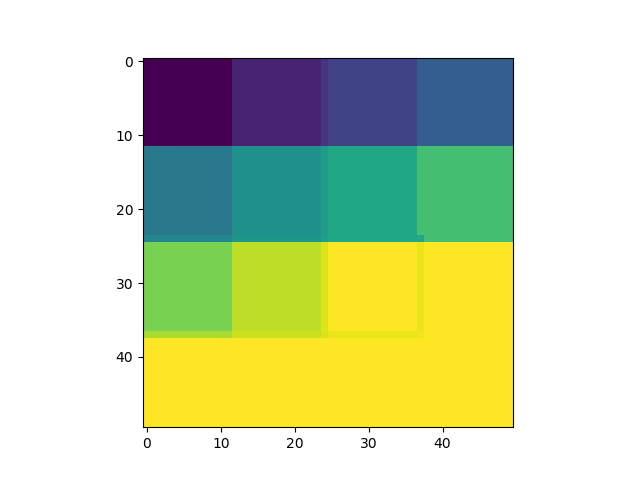

In [116]:
plt.figure(3)
plt.imshow(a1)

In [117]:
phi = np.reshape(np.arctan((absolute_phase/absolute_amplitude)), [height, width])

/Users/j35/anaconda/envs/tapy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


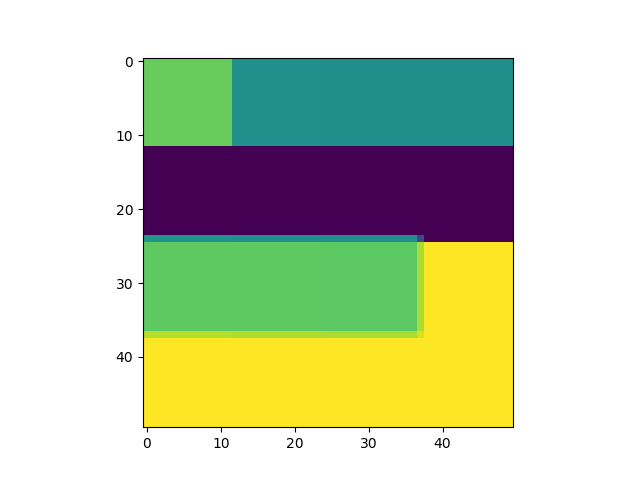

In [118]:
plt.figure(4)
plt.imshow(phi)

In [149]:
a=np.matrix(np.linspace(1,5,5)).T
b=np.matrix(np.ones((5)))
c = a*b
c.T

matrix([[ 1.,  2.,  3.,  4.,  5.],
        [ 1.,  2.,  3.,  4.,  5.],
        [ 1.,  2.,  3.,  4.,  5.],
        [ 1.,  2.,  3.,  4.,  5.],
        [ 1.,  2.,  3.,  4.,  5.]])

##### 